# References
- [Google Colab Terbaru](https://colab.research.google.com/drive/1We63kSttnx-Jp-LDI2FUpKJ4bcKtuscX?usp=sharing)
- https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

# Install Libraries

In [8]:
!pip install pycaret

# Import Libraries

In [9]:
import pycaret
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Data Understanding

## Load Data

In [10]:
data = pd.read_csv("https://gmaaliki.github.io/dataset/predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
data.drop(['Failure Type'], axis=1, inplace=True)
data.drop(['UDI', 'Product ID'], axis=1, inplace=True)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


,count
Target,
0,9661
1,339


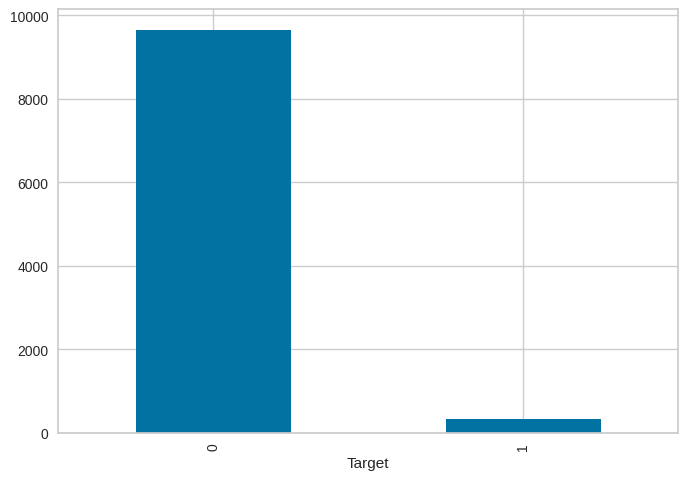

In [ ]:
# Plot the bar plot of Target class count
target_counts = data['Target'].value_counts()
target_counts.plot(kind='bar')
target_counts

# Data Preparation

## Undersample

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = data[data['Target'] == 0]
minority_class = data[data['Target'] == 1]

# Determine the number of samples in the minority class
n_minority = len(minority_class)

# Undersample the majority class to match the number of minority samples
majority_class_undersampled = resample(majority_class,
                                       replace=False,
                                       n_samples=n_minority,
                                       random_state=42)

# Combine minority class with the undersampled majority class
data = pd.concat([majority_class_undersampled, minority_class])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# View the new class distribution
display(data['Target'].value_counts())

# View the first few rows of the undersampled data
display(data.head())

,count
Target,
1,339
0,339


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,L,298.5,309.5,1385,46.3,203,1
1,M,300.0,310.2,1393,51.2,190,0
2,L,301.7,310.6,1513,41.1,64,0
3,M,296.7,307.8,1258,69.0,105,1
4,L,298.8,308.8,1523,44.4,55,0


,count
Target,
1,339
0,339


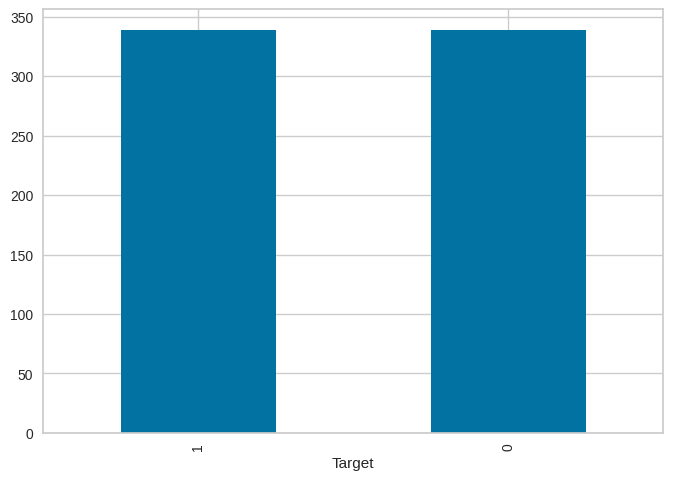

In [ ]:
# Plot the bar plot of Target class count
target_counts = data['Target'].value_counts()
target_counts.plot(kind='bar')
target_counts

# Modeling

## Setup

In [ ]:
target_col = "Target"

In [ ]:
from pycaret.classification import *
s = setup(
    data,
    target = target_col,
    # remove_multicollinearity = True,
    # remove_outliers = True,
    # normalize = True,
    # pca = True,
    # fix_imbalance = True,
    # feature_selection = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(678, 7)"
4,Transformed data shape,"(678, 9)"
5,Transformed train set shape,"(474, 9)"
6,Transformed test set shape,"(204, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [ ]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(
    data,
    target = target_col,
    # remove_multicollinearity = True,
    # remove_outliers = True,
    # normalize = True,
    # pca = True,
    # fix_imbalance = True,
    # feature_selection = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(678, 7)"
4,Transformed data shape,"(678, 9)"
5,Transformed train set shape,"(474, 9)"
6,Transformed test set shape,"(204, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


## Compare Model

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9091,0.9559,0.9283,0.8957,0.9107,0.8181,0.8206,0.2100
rf,Random Forest Classifier,0.8943,0.9555,0.9158,0.8787,0.8956,0.7886,0.7917,0.6070
xgboost,Extreme Gradient Boosting,0.8943,0.9523,0.9197,0.8770,0.8968,0.7885,0.7915,0.1100
lightgbm,Light Gradient Boosting Machine,0.8942,0.9577,0.9076,0.8861,0.8955,0.7884,0.7908,0.6240
ada,Ada Boost Classifier,0.8839,0.9367,0.9038,0.8721,0.8857,0.7677,0.7716,0.2810
dt,Decision Tree Classifier,0.8815,0.8812,0.8900,0.8785,0.8828,0.7627,0.7653,0.1150
et,Extra Trees Classifier,0.8732,0.9470,0.8741,0.8759,0.8721,0.7465,0.7511,0.3970
knn,K Neighbors Classifier,0.8543,0.8982,0.8696,0.8472,0.8563,0.7085,0.7122,0.1760
nb,Naive Bayes,0.8227,0.9003,0.7692,0.8628,0.8107,0.6458,0.6525,0.1070
lr,Logistic Regression,0.8205,0.9054,0.8274,0.8190,0.8217,0.6409,0.6433,1.0370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Analyze Model

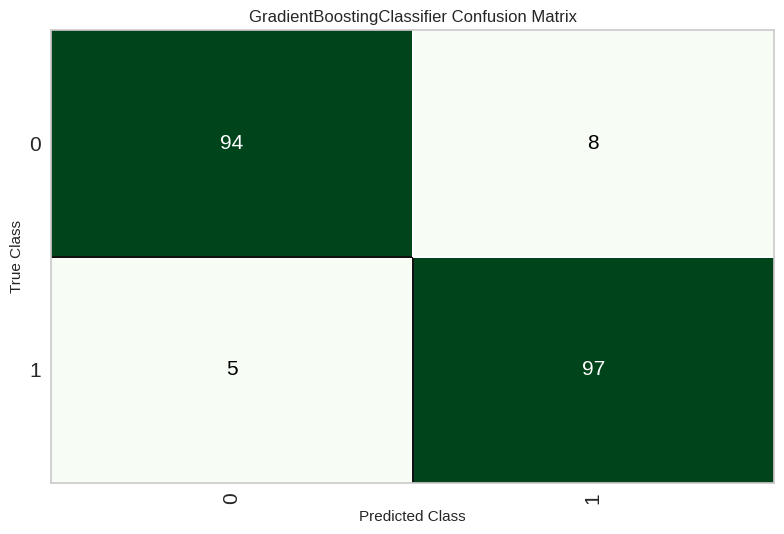

In [ ]:
plot_model(best, plot = 'confusion_matrix')

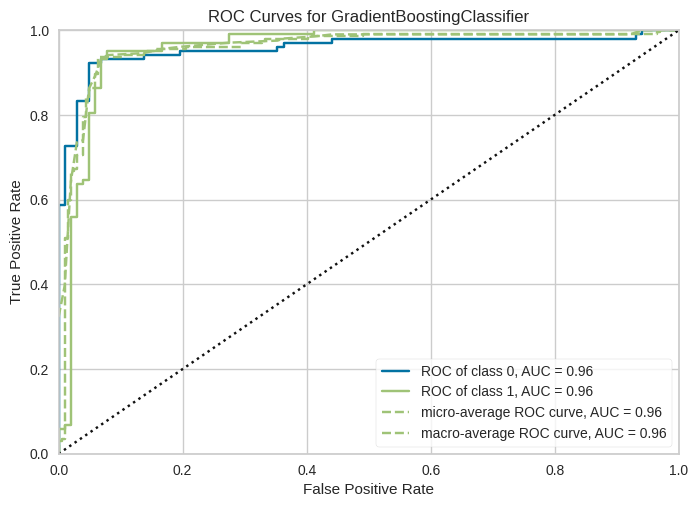

In [ ]:
plot_model(best, plot = 'auc')

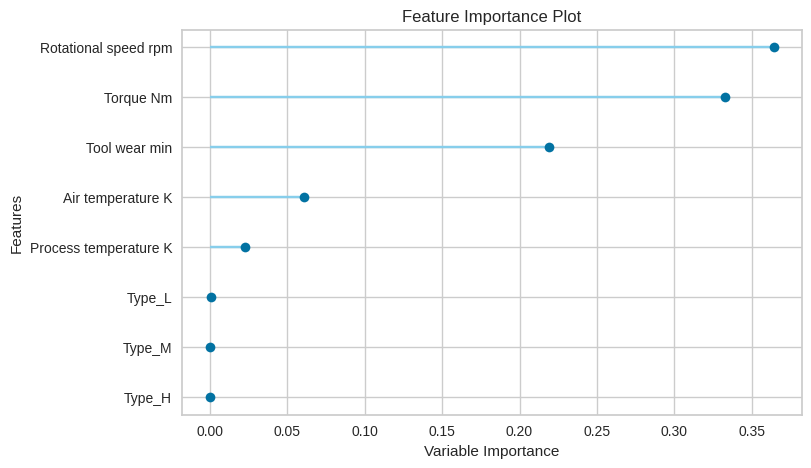

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predict

In [ ]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9363,0.9575,0.9510,0.9238,0.9372,0.8725,0.8729


In [ ]:
holdout_pred.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,prediction_label,prediction_score
326,H,300.399994,311.200012,1489,45.299999,180,0,0,0.9776
521,M,302.100006,311.000000,1351,60.299999,207,1,1,0.9929
243,L,302.500000,311.399994,1674,27.000000,223,0,1,0.9907
38,L,298.600006,309.799988,2271,16.200001,218,1,1,0.6497
62,L,303.799988,313.000000,1365,59.900002,205,1,1,0.9675


## Save Model

In [ ]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categori...
                                             crite

In [ ]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Air temperature [K]',
                                             'Process temperature [K]',
                                             'Rotational speed [rpm]',
                                             'Torque [Nm]', 'Tool wear [min]'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean')))...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

# Ensemble Modeling

## Define Ensemble Model

In [ ]:
best_models_top = compare_models(sort = 'AUC', n_select = 3)
best_models_top

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8942,0.9577,0.9076,0.8861,0.8955,0.7884,0.7908,0.3730
gbc,Gradient Boosting Classifier,0.9091,0.9559,0.9283,0.8957,0.9107,0.8181,0.8206,0.3580
rf,Random Forest Classifier,0.8943,0.9555,0.9158,0.8787,0.8956,0.7886,0.7917,0.2490
xgboost,Extreme Gradient Boosting,0.8943,0.9523,0.9197,0.8770,0.8968,0.7885,0.7915,0.1070
et,Extra Trees Classifier,0.8732,0.9470,0.8741,0.8759,0.8721,0.7465,0.7511,0.2130
ada,Ada Boost Classifier,0.8839,0.9367,0.9038,0.8721,0.8857,0.7677,0.7716,0.1890
lda,Linear Discriminant Analysis,0.8185,0.9084,0.8190,0.8213,0.8182,0.6370,0.6399,0.1140
ridge,Ridge Classifier,0.8185,0.9079,0.8190,0.8213,0.8182,0.6370,0.6399,0.0670
lr,Logistic Regression,0.8205,0.9054,0.8274,0.8190,0.8217,0.6409,0.6433,0.2510
nb,Naive Bayes,0.8227,0.9003,0.7692,0.8628,0.8107,0.6458,0.6525,0.0660


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                           

In [ ]:
# Tune each of the top models
tuned_models = []
for model in best_models_top:
    tuned_model = tune_model(model, optimize='AUC')
    tuned_models.append(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,0.9826,0.9583,1.0000,0.9787,0.9583,0.9592
1,0.9583,0.9618,1.0000,0.9231,0.9600,0.9167,0.9199
2,0.8333,0.9444,0.8333,0.8333,0.8333,0.6667,0.6667
3,0.9167,0.9618,0.9583,0.8846,0.9200,0.8333,0.8362
4,0.8936,0.9239,1.0000,0.8276,0.9057,0.7862,0.8048
5,0.8511,0.8732,0.8750,0.8400,0.8571,0.7017,0.7024
6,0.8511,0.9239,0.9167,0.8148,0.8627,0.7012,0.7070
7,0.8723,0.9565,0.9130,0.8400,0.8750,0.7450,0.7477
8,0.8936,0.9620,0.9565,0.8462,0.8980,0.7877,0.7942


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9878,0.9167,1.0000,0.9565,0.9167,0.9199
1,0.9583,0.9809,1.0000,0.9231,0.9600,0.9167,0.9199
2,0.8750,0.9462,0.8750,0.8750,0.8750,0.7500,0.7500
3,0.9792,0.9740,1.0000,0.9600,0.9796,0.9583,0.9592
4,0.9149,0.9547,0.9583,0.8846,0.9200,0.8294,0.8324
5,0.8298,0.9130,0.8333,0.8333,0.8333,0.6594,0.6594
6,0.9149,0.9420,0.9583,0.8846,0.9200,0.8294,0.8324
7,0.8936,0.9656,0.8696,0.9091,0.8889,0.7869,0.7877
8,0.8723,0.9674,0.9130,0.8400,0.8750,0.7450,0.7477


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,0.9757,0.9583,1.0000,0.9787,0.9583,0.9592
1,0.9375,0.9653,1.0000,0.8889,0.9412,0.8750,0.8819
2,0.8542,0.9401,0.8333,0.8696,0.8511,0.7083,0.7089
3,0.9375,0.9913,0.9583,0.9200,0.9388,0.8750,0.8758
4,0.8936,0.9783,0.9167,0.8800,0.8980,0.7869,0.7877
5,0.8085,0.8895,0.7500,0.8571,0.8000,0.6179,0.6230
6,0.8936,0.9420,0.9167,0.8800,0.8980,0.7869,0.7877
7,0.8723,0.9366,0.7826,0.9474,0.8571,0.7436,0.7547
8,0.8723,0.9194,0.9130,0.8400,0.8750,0.7450,0.7477


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
blender = blend_models(
    tuned_models,
    choose_better=True
    )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9931,0.9167,1.0000,0.9565,0.9167,0.9199
1,0.9583,0.9826,1.0000,0.9231,0.9600,0.9167,0.9199
2,0.8750,0.9618,0.8750,0.8750,0.8750,0.7500,0.7500
3,0.9792,0.9757,1.0000,0.9600,0.9796,0.9583,0.9592
4,0.8936,0.9511,0.9167,0.8800,0.8980,0.7869,0.7877
5,0.8298,0.9094,0.8333,0.8333,0.8333,0.6594,0.6594
6,0.9149,0.9293,0.9583,0.8846,0.9200,0.8294,0.8324
7,0.8936,0.9565,0.9130,0.8750,0.8936,0.7873,0.7880
8,0.8936,0.9710,0.9130,0.8750,0.8936,0.7873,0.7880


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Analyze Model

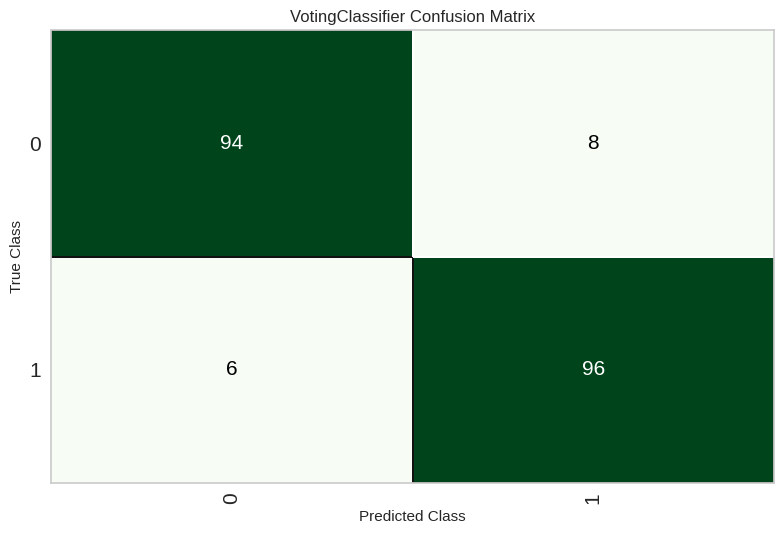

In [ ]:
plot_model(blender, plot = 'confusion_matrix')

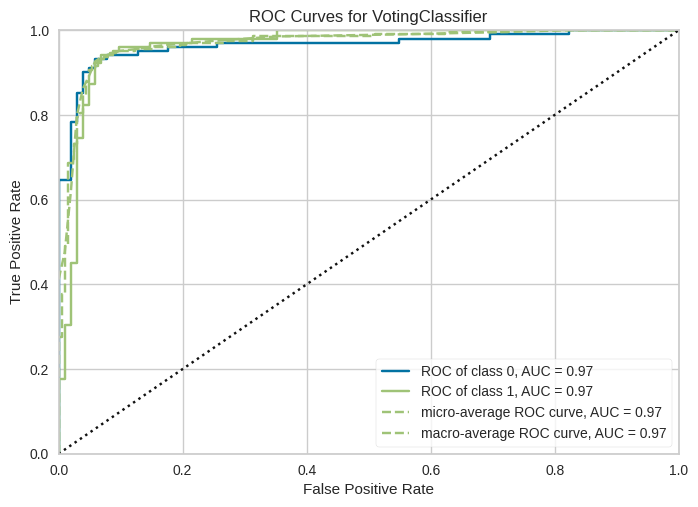

In [ ]:
plot_model(blender, plot = 'auc')

In [ ]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predict

In [ ]:
holdout_pred = predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9314,0.9652,0.9412,0.9231,0.9320,0.8627,0.8629


In [ ]:
holdout_pred.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,prediction_label,prediction_score
326,H,300.399994,311.200012,1489,45.299999,180,0,0,0.9678
521,M,302.100006,311.000000,1351,60.299999,207,1,1,0.9847
243,L,302.500000,311.399994,1674,27.000000,223,0,1,0.8377
38,L,298.600006,309.799988,2271,16.200001,218,1,1,0.8274
62,L,303.799988,313.000000,1365,59.900002,205,1,1,0.9475


## Save Model

In [ ]:
save_model(blender, 'blended_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Process temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categori...
                                                  

In [ ]:
loaded_best_pipeline = load_model('blended_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Air temperature [K]',
                                             'Process temperature [K]',
                                             'Rotational speed [rpm]',
                                             'Torque [Nm]', 'Tool wear [min]'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean')))...
                                                                      max_features='sqrt',
                                                                      max_leaf_nodes=None,
                                                                      max_samples=None,
                                                                      min_impurity_decrease=0.0,
                                                                      min_samples_leaf=1,
                                                                      min_samples_split=2,
                                                                      min_weight_fraction_leaf=0.0,
                                                                      monotonic_cst=None,
                                                                      n_estimators=100,
                                                                      n_jobs=-1,
                                                                      oob_score=False,
                                                                      random_state=123,
                                                                      verbose=0,
                                                                      warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)